In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../curiosity/')

In [67]:
SAVE=False
DECIMATE = 1
WINDOW = 1

In [27]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [28]:
plot_typography(False, 12, 14, 16)

In [69]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")


def figure_factory(log_dir, env, decimate=100, save=True,
                   loc_feat=1, loc_rwd=4, zoom_feat=2.5, zoom_rwd=2.5, window=1000):
        
    # load data 
    el = EnvLogger(env, log_dir, decimate)

    # plot
    rwd_metrics = el.plot_decorator(keyword="ep_rewards", save=save, loc=loc_rwd, zoom=zoom_rwd, window=window)

    return rwd_metrics

---------------------------------------------------
Baseline, Bigbatch Long Train
ICM, ep_rewards, 19.47055153447739, 0.7931183816758879
Baseline, Diff Entropy
ICM-TER, ep_rewards, 16.066803550078397, 0.6544692484842145
RCM, RCM
RCM, ep_rewards, 24.549363606143398, 1.0


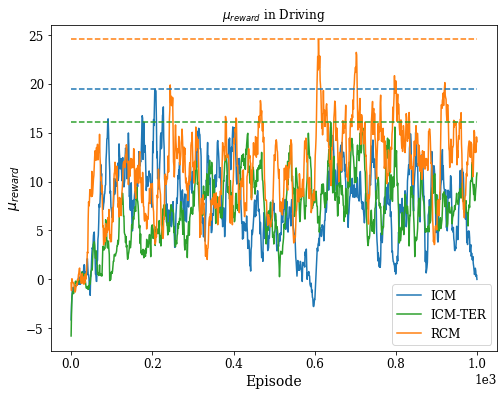

In [74]:
pong_metrics4 = figure_factory(log_dir, "Driving",DECIMATE, save=SAVE, loc_rwd=4, loc_feat=1, zoom_rwd=2., zoom_feat=4,
                               window=WINDOW) 

In [75]:
pong_metrics4

{'ICM': 19.47055153447739,
 'ICM-TER': 16.066803550078397,
 'RCM': 24.549363606143398}